# Introduction to Pandas

### Useful Jupyter Notebook Hotkeys

In Jupyter Notebooks, there are several hotkeys that may come in useful:
* Press `Shift`+`Enter` to execute the currently selected cell.
* Press `Shift`+`CTRL`+`-` to split the current cell in two at the current position of the cursor.

You can enter `Command Mode` by pressing `Esc`. You should see the indicator box around your currently selected cell change from Green to Blue.
Once in `Command Mode`:
* Press `a` to insert a new cell above the currently selected cell.
* Press `b` to insert a new cell below the currently selected cell.
* Press `d` twice in a row to delete the currently selected cell.
* Press `m` to swap the current cell to Markdown (or text) format.
* Press `y` to swap the current cell back to Code format.


## Creating a DataFrame

In [5]:
import pandas

A table in Pandas is called a DataFrame, and it can be created from a Dictionary, or by importing data from a `.csv`, or `.json` file, or from an SQL database (among many other methods). In this hackathon, all of the provided data sets should be in `.csv` format, but if you find another source of data that you want to use, you can probably import it into a DataFrame somehow.

In [6]:
example_dict = {
    "apples": [1, 2, 3, 4, 5],
    "oranges": [2, 4, 6, 8, 10],
    "bananas": [1, 0, 3, 4, 2]
};

df_from_dict = pandas.DataFrame(example_dict);

df_from_dict


,apples,oranges,bananas
0,1,2,1
1,2,4,0
2,3,6,3
3,4,8,4
4,5,10,2


However, it would be impractical with these large datasets to retype the data, so we'll import the data from the `.csv` file using Pandas' `.read_csv` function.

In [7]:
df = pandas.read_csv("../potential_datasets/election_2019/HoC-GE2019-results-by-candidate.csv")

## Having a look at the data

To start with, it is best to get familiar with the data that you will be analysing. A good way of doing this is with the `.head()` function, which allows you to have a quick look at the first few rows of data in the DataFrame. From this, you can get a look at what each of the columns are, and the general sort of data in each of them.

In [8]:
df.head()

,ons_id,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,party_name,party_abbreviation,firstname,surname,gender,sitting_mp,former_mp,votes,share,change
0,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Labour,Lab,Stephen,Kinnock,Male,Yes,Yes,17008,0.538262,-0.142933
1,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Conservative,Con,Charlotte,Lang,Female,No,No,6518,0.206279,0.028901
2,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Brexit Party,Brexit,Glenda,Davies,Female,No,No,3108,0.098361,NaN
3,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Plaid Cymru,PC,Nigel,Hunt,Male,No,No,2711,0.085797,0.002804
4,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Liberal Democrat,LD,Sheila,Kingston-Jones,Female,No,No,1072,0.033926,0.015921


You can see above that the DataFrame is made of up several Columns, or `Series`, each of which holds a point of data for every row in the DataFrame. We can select a specific column as follows:

In [9]:
df['country_name']

0         Wales
1         Wales
2         Wales
3         Wales
4         Wales
         ...   
3315    England
3316    England
3317    England
3318    England
3319    England
Name: country_name, Length: 3320, dtype: object

We can examine each of these Columns a bit more closely using some of their inbuilt functions. One such is `.unique()`, which we can use to find out the number of unique values in a given column.

In [10]:
df['country_name'].unique()

array(['Wales', 'Scotland', 'England', 'Northern Ireland'], dtype=object)

We can go further into exploring this separation of data by counting how many records we have for each country in the dataset. To do this we can group the data by value in the `country_name` column. The `.groupby()` function of the DataFrame will return a generator of `Value, Group` pairs, where each `Value` is a value in the specified column, and each `Group` is the subset of the DataFrame that have the given value in that column.

In [11]:
df.groupby('country_name')
for value, subset_df in df.groupby('country_name'):
    print(value, len(subset_df))

England 2710
Northern Ireland 102
Scotland 292
Wales 216


However, we can do this slightly easier by using Pandas `.count()` method. This will count how many values are present in each column, for each group.

In [12]:
df.groupby('country_name').count()

,ons_id,ons_region_id,constituency_name,county_name,region_name,constituency_type,party_name,party_abbreviation,firstname,surname,gender,sitting_mp,former_mp,votes,share,change
country_name,,,,,,,,,,,,,,,,
England,2710,2710,2710,2710,2710,2710,2710,2710,2710,2710,2710,2710,2710,2710,2710,2058
Northern Ireland,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,87
Scotland,292,292,292,292,292,292,292,292,292,292,292,292,292,292,292,242
Wales,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,154


As you can see in the far right of the table above, the last column `change` does not have the same numbers as the rest of the columns. This might warrant a closer look.

In [13]:
df['change']

0      -0.142933
1       0.028901
2            NaN
3       0.002804
4       0.015921
          ...   
3315         NaN
3316   -0.017503
3317   -0.053570
3318    0.077620
3319         NaN
Name: change, Length: 3320, dtype: float64

Thankfully we can see right away that several of the entries do not have values in this column, indicated here by the `NaN` values (NumPy's `Not a Number` value).

We could work out how many entries do not have a `change` value by simply counting the values and subtracting from the total number of rows, like so

In [14]:
df.count()

ons_id                3320
ons_region_id         3320
constituency_name     3320
county_name           3320
region_name           3320
country_name          3320
constituency_type     3320
party_name            3320
party_abbreviation    3320
firstname             3320
surname               3320
gender                3320
sitting_mp            3320
former_mp             3320
votes                 3320
share                 3320
change                2541
dtype: int64

However, we could also use the DataFrame's `.isnan()` function, and sum up the result (as `.isnan()` will produce either a 1 or 0).

In [15]:
df['change'].isna().sum()

779

To get a better feeling of what these anomalies are, we can filter the DataFrame to just have a look at the rows that don't have a `change` value.

In [16]:
df[ df['change'].isna() ].groupby(["sitting_mp", "former_mp"]).size()

sitting_mp  former_mp
No          No           764
            Yes            3
Yes         Yes           12
dtype: int64

In [17]:
df.loc[ (df['change'].isna()) & (df['sitting_mp'] == "Yes")]

,ons_id,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,party_name,party_abbreviation,firstname,surname,gender,sitting_mp,former_mp,votes,share,change
152,E14000550,E12000008,Beaconsfield,Buckinghamshire,South East,England,County,Independent,Ind,Dominic,Grieve,Male,Yes,Yes,16765,0.289711,NaN
215,E14000559,E12000002,Birkenhead,Merseyside,North West,England,Borough,Birkenhead Social Justice Party,Birkenhead Social Justice Party,Frank,Field,Male,Yes,Yes,7285,0.172104,NaN
232,E14000562,E12000005,"Birmingham, Hall Green",West Midlands,West Midlands,England,Borough,Independent,Ind,Roger,Godsiff,Male,Yes,Yes,4273,0.080758,NaN
483,E14000607,E12000004,Broxtowe,Nottinghamshire,East Midlands,England,County,The Independent Group for Change,IGC,Anna,Soubry,Female,Yes,Yes,4668,0.084455,NaN
514,E14000612,E12000002,Bury South,Greater Manchester,North West,England,Borough,Independent,Ind,Ivan,Lewis,Male,Yes,Yes,1366,0.027171,NaN
677,E14000637,E12000002,Chorley,Lancashire,North West,England,County,Speaker,Spk,Lindsay,Hoyle,Male,Yes,Yes,26831,0.672962,NaN
839,E14000662,E12000004,Derby North,Derbyshire,East Midlands,England,Borough,Independent,Ind,Chris,Williamson,Male,Yes,Yes,635,0.013506,NaN
1297,E14000719,E12000008,Guildford,Surrey,South East,England,County,Independent,Ind,Anne,Milton,Female,Yes,Yes,4356,0.074270,NaN
1508,E14000760,E12000007,Ilford South,London,London,England,Borough,The Independent Group for Change,IGC,Mike,Gapes,Male,Yes,Yes,3891,0.072760,NaN
1801,E14000801,E12000006,Luton South,Bedfordshire,East,England,Borough,Independent,Ind,Gavin,Shuker,Male,Yes,Yes,3893,0.092549,NaN


In [18]:
df.loc[ (df['change'].isna()) & (df['sitting_mp'] == "Yes")]['party_name'].unique()

array(['Independent', 'Birkenhead Social Justice Party',
       'The Independent Group for Change', 'Speaker'], dtype=object)

In [19]:
df.loc[ (df['change'].notna()) & (df['sitting_mp'] == "Yes")]['party_name'].unique()

array(['Labour', 'Scottish National Party', 'Conservative',
       'Liberal Democrat', 'Plaid Cymru', 'Labour and Co-operative',
       'Democratic Unionist Party', 'Sinn Fein', 'Green'], dtype=object)

In [20]:
for party, subset_df in df.groupby("party_name"):
    select = subset_df.loc[ df['sitting_mp'] == "Yes" ]
    print(party, "{}/{}".format(select['change'].isna().sum(),len(select)))

Advance Together 0/0
Alliance 0/0
Alliance for Green Socialism 0/0
Animal Welfare Party 0/0
Aontú 0/0
Ashfield Independents 0/0
Birkenhead Social Justice Party 1/1
Brexit Party 0/0
British National Party 0/0
Burnley and Padiham independent Party 0/0
Christian Party, Proclaiming Christ's Lordship 0/0
Christian Peoples Alliance Party 0/0
Church of the Militant Elvis Party 0/0
Communist League Election Campaign 0/0
Communities United Party 0/0
Conservative 0/266
Cumbria First  0/0
Democratic Unionist Party 0/9
English Democrats 0/0
Green 0/1
Gwlad Gwlad 0/0
Heavy Woollen District Independents 0/0
Independent 7/7
Independent Network 0/0
Justice and Anti-Corruption Party 0/0
Labour 0/192
Labour and Co-operative 0/30
Liberal 0/0
Liberal Democrat 0/18
Libertarian Party 0/0
Linconshire Independents  0/0
Mebyon Kernow 0/0
Monster Raving Loony Party 0/0
Motherworld Party 0/0
Patria 0/0
People Before Profit Alliance 0/0
Plaid Cymru 0/4
Proud of Oldham & Saddleworth 0/0
Psychedelic Future Party 0/

In [21]:
subset_df

,ons_id,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,party_name,party_abbreviation,firstname,surname,gender,sitting_mp,former_mp,votes,share,change
1096,E14000693,E12000006,Epping Forest,Essex,East,England,County,Young People's Party,Young People's Party,Thomas,Hall,Male,No,No,181,0.003601,0.001434
1166,E14000704,E12000008,Folkestone and Hythe,Kent,South East,England,County,Young People's Party,Young People's Party,Rohen,Kapur,Male,No,No,80,0.001356,NaN
1715,E14000787,E12000007,Lewisham East,London,London,England,Borough,Young People's Party,Young People's Party,Richard,Galloway,Male,No,No,50,0.001116,NaN


As we can see above, the only rows that do not have a change value are either those where the winning MP was not the previous sitting MP, or where the MP runs as an Independent.

# Example of using Geopandas

In [22]:
import geopandas

In [23]:
mapdf = geopandas.read_file("../potential_datasets/election_2019/UK_Constituencies_December_2017_/Westminster_Parliamentary_Constituencies_December_2017_Generalised_Clipped_Boundaries_in_the_UK.shp")

In [24]:
import matplotlib.pyplot as plt

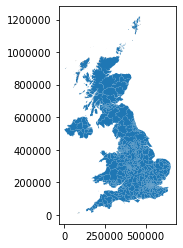

In [32]:
mapdf.plot()
plt.show()

<Figure size 432x288 with 0 Axes>

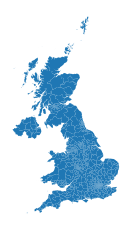

In [34]:
f, ax = plt.subplots(0)
ax = mapdf.plot()
ax.set_axis_off()
plt.show()